# Customer Segmentation using K-means Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
print(df.head())          
print(df.info())          
print(df.describe())      
print("Missing values:\n", df.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [5]:
df = df.dropna()

df = df.drop_duplicates()
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [6]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [7]:
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

selected_features = df[num_cols.tolist() + ['TotalPrice']] if 'TotalPrice' in df.columns else df[num_cols]

print("Final dataset shape:", df.shape)
print("Selected features:\n", selected_features.head())

Final dataset shape: (392692, 9)
Selected features:
    Quantity  UnitPrice  CustomerID  TotalPrice
0 -0.039446  -0.025893    1.495244    0.001021
1 -0.039446   0.011873    1.495244   -0.000468
2 -0.028365  -0.016901    1.495244    0.000479
3 -0.039446   0.011873    1.495244   -0.000468
4 -0.039446   0.011873    1.495244   -0.000468


In [8]:
X = selected_features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

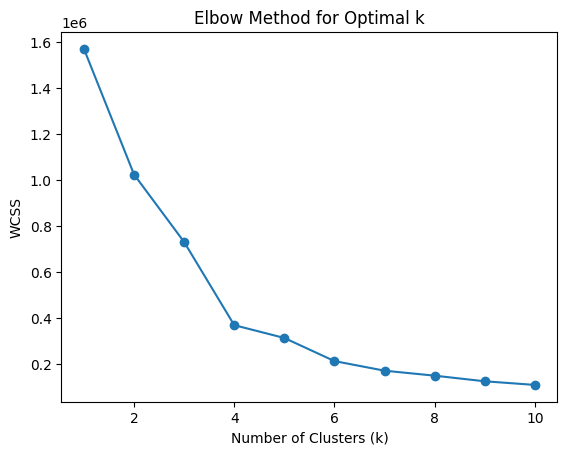

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [10]:
optimal_k = 4   # choose based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


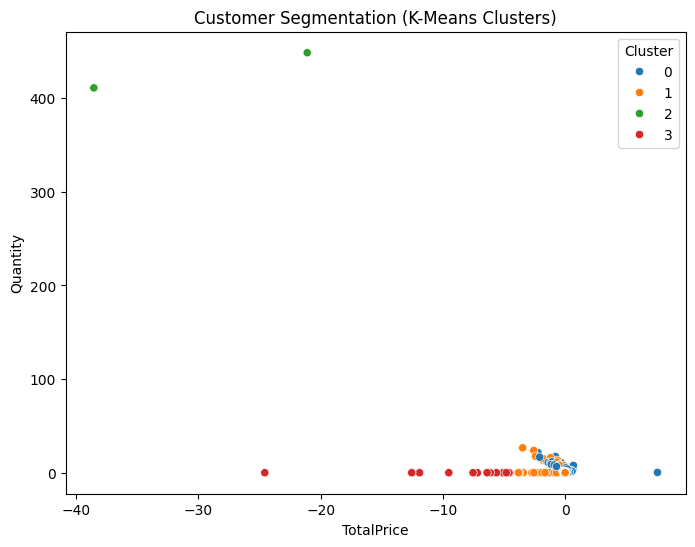

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['TotalPrice'], 
    y=df['Quantity'], 
    hue=df['Cluster'], 
    palette='tab10'
)
plt.title("Customer Segmentation (K-Means Clusters)")
plt.show()

In [12]:
summary = df.groupby('Cluster').agg({
    'Quantity':['mean','median','std'],
    'UnitPrice':['mean','median','std'],
    'TotalPrice':['mean','median','std']
})
print("Cluster Summary:\n", summary)

Cluster Summary:
            Quantity                          UnitPrice                        \
               mean      median        std        mean     median        std   
Cluster                                                                        
0         -0.007144   -0.050527   0.258416   -0.013393  -0.060063   0.225623   
1          0.002129   -0.039446   0.220021    0.002134  -0.052870   0.463873   
2        429.889532  429.889532  26.561665   -0.070404  -0.070404   0.033063   
3         -0.067148   -0.067148   0.000000  124.980107  93.642529  76.709540   

        TotalPrice                        
              mean     median        std  
Cluster                                   
0        -0.003034   0.000523   0.033569  
1        -0.005000   0.000328   0.038345  
2       -29.826865 -29.826865  12.343585  
3        -8.392154  -6.287901   5.150886  


C:\Users\adity\AppData\Local\Temp\ipykernel_12452\1063401558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='TotalPrice', data=df, estimator='mean', palette='Set2')


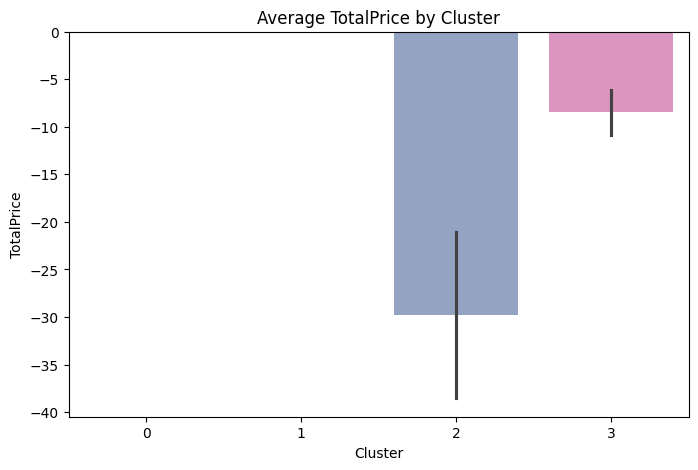

C:\Users\adity\AppData\Local\Temp\ipykernel_12452\1063401558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Quantity', data=df, palette='Set3')


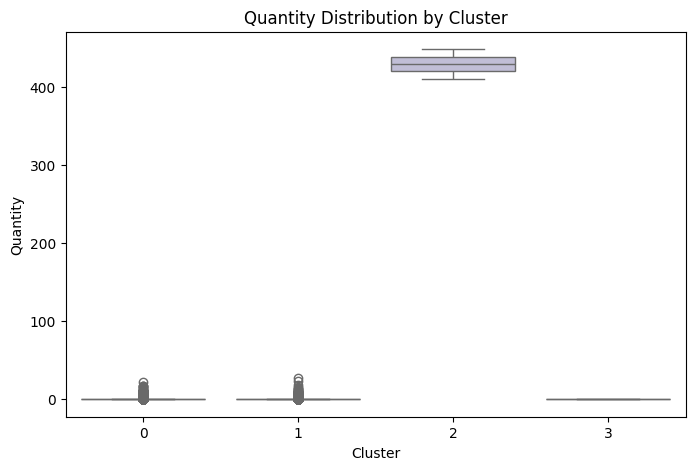

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='Cluster', y='TotalPrice', data=df, estimator='mean', palette='Set2')
plt.title("Average TotalPrice by Cluster")
plt.show()

# Quantity distribution by cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Quantity', data=df, palette='Set3')
plt.title("Quantity Distribution by Cluster")
plt.show()